In [ ]:
import pandas as pd
import numpy as np
import plotly.tools as tls
import plotly.figure_factory as ff
from scipy import stats
import statistics as stat
import seaborn as sns

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition-final.csv")

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Emotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,6
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,5
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,4


In [ ]:
df.info()
#conclusion - no missing values in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#splitting training and testing dataset, Using stratify as emotion to have equal distributions of emotion in training and test dataset.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df["Attrition"],test_size=.20, random_state=42, stratify=df["Emotion"])

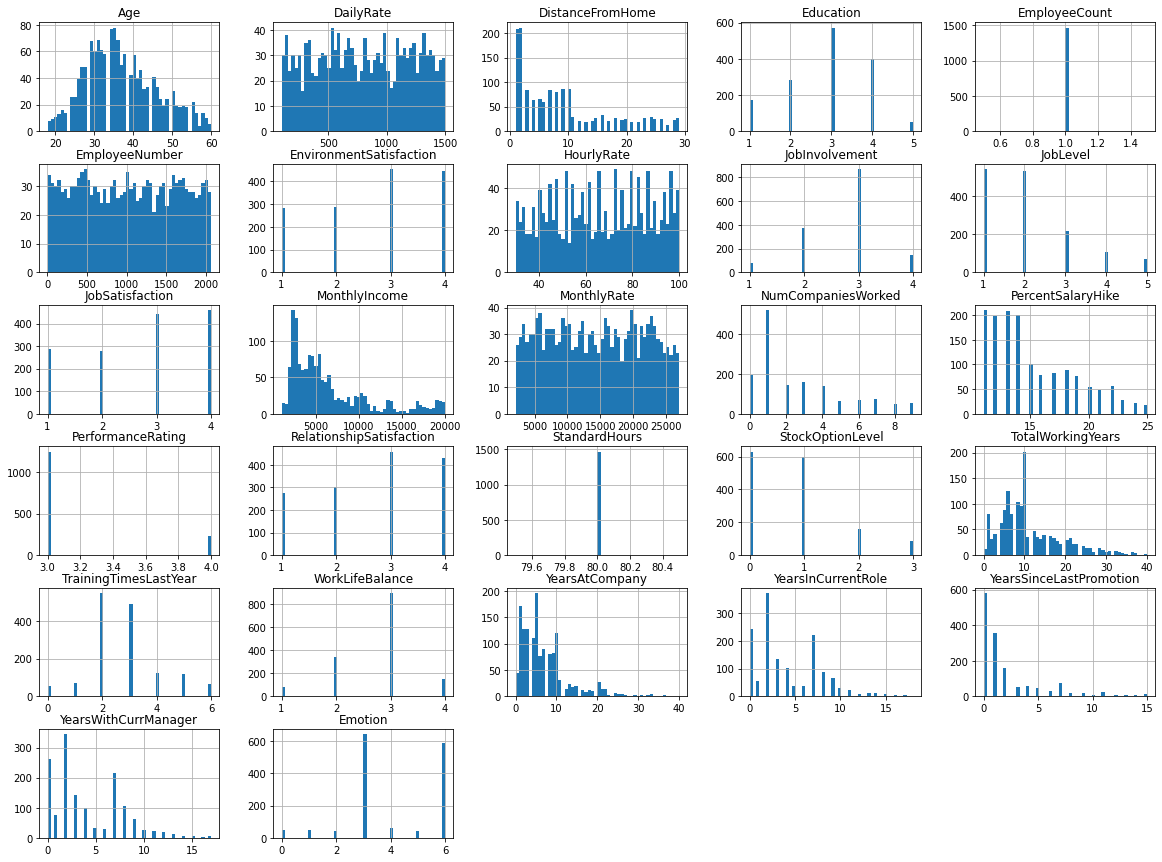

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()


In [ ]:
X_train.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Attrition                      2
PerformanceRating              2
Gender                         2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
EnvironmentSatisfaction        4
WorkLifeBalance                4
JobInvolvement                 4
RelationshipSatisfaction       4
JobSatisfaction                4
StockOptionLevel               4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
Emotion                        7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                33
TotalWorkingYears             39
Age       

In [ ]:
#dropping columns which have same value across all dataset and few repetive columns.
X_train=X_train.drop(columns=['Over18','StandardHours','EmployeeCount','HourlyRate','DailyRate','MonthlyRate'])
X_train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Emotion
616,51,No,Travel_Rarely,Sales,26,4,Marketing,851,1,Female,...,3,1,29,2,2,20,6,4,17,6
390,43,No,Travel_Rarely,Research & Development,12,3,Life Sciences,520,1,Male,...,3,1,25,3,3,25,10,3,9,6
677,49,No,Travel_Rarely,Research & Development,8,2,Other,944,1,Female,...,3,1,29,3,2,26,9,1,7,3
1076,54,No,Travel_Frequently,Research & Development,11,4,Medical,1520,2,Female,...,1,1,26,2,3,14,9,1,12,3
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,4


In [ ]:
#dropping columns which have same value across all dataset and few repetive columns from est dataset.

X_test=X_test.drop(columns=['Over18','StandardHours','EmployeeCount','HourlyRate','DailyRate','MonthlyRate'])
X_test.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Emotion
1352,44,No,Travel_Rarely,Research & Development,1,4,Life Sciences,1903,2,Male,...,4,1,10,5,3,2,0,2,2,3
803,34,No,Non-Travel,Research & Development,3,4,Life Sciences,1115,3,Male,...,4,3,6,2,3,0,0,0,0,3
263,46,No,Travel_Rarely,Sales,2,3,Technical Degree,363,3,Female,...,2,1,28,2,2,7,7,7,7,6
1015,34,No,Travel_Frequently,Research & Development,1,4,Other,1431,4,Male,...,3,2,10,2,3,4,3,1,3,6
555,29,No,Travel_Rarely,Sales,10,3,Marketing,766,4,Male,...,4,2,2,2,3,2,2,2,2,6


In [ ]:
#computing more relavent column and dropping not so useful columns from training dataset.

X_train['AvgSatisfaction']=X_train['EnvironmentSatisfaction']+X_train['JobSatisfaction'] + X_train['RelationshipSatisfaction']/3
X_train=X_train.drop(columns=['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction'])

X_train['AvgPerCompanyStay']=X_train['TotalWorkingYears'] / (X_train['NumCompaniesWorked']+1)
X_train=X_train.drop(columns=['NumCompaniesWorked'])

X_train['EducationField'] = X_train['EducationField'].replace(['Life Sciences','Medical'],'Technical Degree')
X_train['EducationField'] = X_train['EducationField'].replace(['Marketing','Human Resources','Other'],'Non Technical Degree')

X_train['JobRole'] = X_train['JobRole'].replace(['Research Scientist','Laboratory Technician','Research Director'],'Technical')
X_train['JobRole'] = X_train['JobRole'].replace(['Sales Executive','Sales Representative','Human Resources'],'Non Technical')
X_train['JobRole'] = X_train['JobRole'].replace(['Manager','Manufacturing Director','Healthcare Representative'],'Semi Technical')

In [ ]:
#computing more relavent column and dropping not so useful columns from test dataset..

X_test['AvgSatisfaction']=X_test['EnvironmentSatisfaction']+X_test['JobSatisfaction'] + X_test['RelationshipSatisfaction']/3
X_test=X_test.drop(columns=['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction'])

X_test['AvgPerCompanyStay']=X_test['TotalWorkingYears'] / (X_test['NumCompaniesWorked']+1)
X_test=X_test.drop(columns=['NumCompaniesWorked'])

X_test['EducationField'] = X_test['EducationField'].replace(['Life Sciences','Medical'],'Technical Degree')
X_test['EducationField'] = X_test['EducationField'].replace(['Marketing','Human Resources','Other'],'Non Technical Degree')

X_test['JobRole'] = X_test['JobRole'].replace(['Research Scientist','Laboratory Technician','Research Director'],'Technical')
X_test['JobRole'] = X_test['JobRole'].replace(['Sales Executive','Sales Representative','Human Resources'],'Non Technical')
X_test['JobRole'] = X_test['JobRole'].replace(['Manager','Manufacturing Director','Healthcare Representative'],'Semi Technical')

In [ ]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 616 to 207
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1176 non-null   int64  
 1   Attrition                1176 non-null   object 
 2   BusinessTravel           1176 non-null   object 
 3   Department               1176 non-null   object 
 4   DistanceFromHome         1176 non-null   int64  
 5   Education                1176 non-null   int64  
 6   EducationField           1176 non-null   object 
 7   EmployeeNumber           1176 non-null   int64  
 8   Gender                   1176 non-null   object 
 9   JobInvolvement           1176 non-null   int64  
 10  JobLevel                 1176 non-null   int64  
 11  JobRole                  1176 non-null   object 
 12  MaritalStatus            1176 non-null   object 
 13  MonthlyIncome            1176 non-null   int64  
 14  OverTime               

In [ ]:
#checking 15 categorical variable and 12 numeric variables

cat_columns=X_train[['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField',  'Gender',
                   'JobInvolvement', 'JobRole','JobLevel', 'MaritalStatus', 'OverTime',  'PerformanceRating',
                    'WorkLifeBalance', 'Emotion','StockOptionLevel']]

num_columns=X_train[['Age','DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 
                     'TrainingTimesLastYear',  'YearsAtCompany',
                     'YearsInCurrentRole', 'YearsSinceLastPromotion',
                     'YearsWithCurrManager', 'AvgSatisfaction', 'AvgPerCompanyStay']]


<AxesSubplot:xlabel='Emotion', ylabel='Count'>

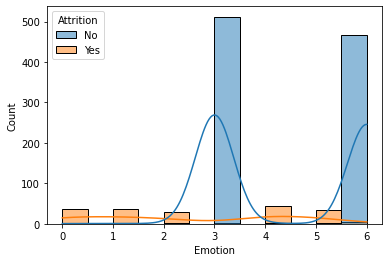

In [ ]:
sns.histplot(data=X_train, x='Emotion', hue='Attrition',kde=True)
# Emotion coding 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Calm
#conclusion - there is high correlation in emotion and attrition

<AxesSubplot:xlabel='Age', ylabel='Count'>

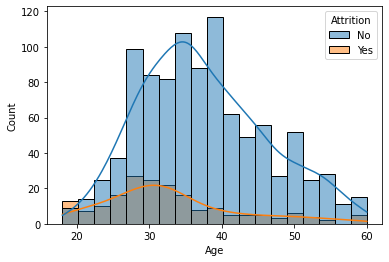

In [ ]:
sns.histplot(data=X_train, x='Age', hue='Attrition',kde=True)


In [ ]:
#it is classification problem and anovo testing could be used to find corelation between output and numeric predictiors. 


def anova(feature,label):
    groups= X_train[label].unique()
    grouped_value=[]
    for group in groups:
        grouped_value.append(X_train[X_train[label]==group][feature])

    return stats.f_oneway(*grouped_value)


In [ ]:
anova('Age','Attrition')

F_onewayResult(statistic=40.435693549742915, pvalue=2.90412905845836e-10)

In [ ]:
print (  str(round(2.90412905845836e-10,4)))
# Concliusion - p< .05 it means age and attrition are  corelated

0.0


F_onewayResult(statistic=7.230812784395065, pvalue=0.007267773749716862)

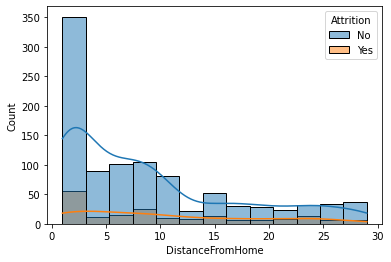

In [ ]:
sns.histplot(data=X_train, x='DistanceFromHome', hue='Attrition',kde=True)
anova('DistanceFromHome','Attrition')

# Concliusion : p< .05 it means DistanceFromHome and attrition are  corelated

F_onewayResult(statistic=31.66218411094126, pvalue=2.2925820876872722e-08)

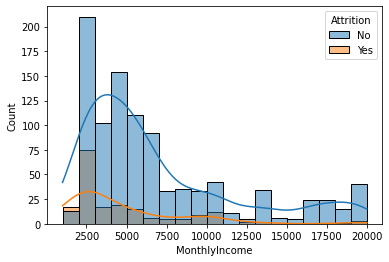

In [ ]:
sns.histplot(data=X_train, x='MonthlyIncome', hue='Attrition',kde=True)
anova('MonthlyIncome','Attrition')


In [ ]:
print (  str(round(2.2925820876872722e-08,4)))
# Concliusion : p< .05 it means MonthlyIncome and attrition are  corelated

0.0


F_onewayResult(statistic=0.14733222074954094, pvalue=0.7011674352620523)

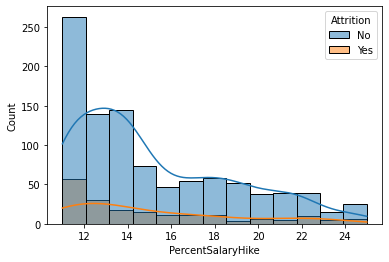

In [ ]:
sns.histplot(data=X_train, x='PercentSalaryHike', hue='Attrition',kde=True)
anova('PercentSalaryHike','Attrition')


In [ ]:
print (  str(round(0.7011674352620523,4)))
# Concliusion :  p > .05 it means PercentSalaryHike and attrition are not corelated

0.7012


F_onewayResult(statistic=36.193823880891244, pvalue=2.3834328862984765e-09)

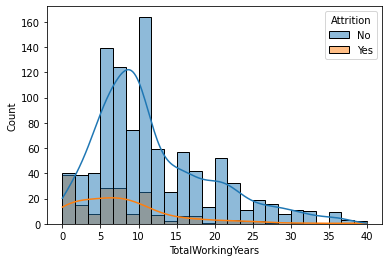

In [ ]:
sns.histplot(data=X_train, x='TotalWorkingYears', hue='Attrition',kde=True)
anova('TotalWorkingYears','Attrition')


In [ ]:
print (  str(round(2.3834328862984765e-09,4)))
# Concliusion : p < .05 it means TotalWorkingYears and attrition are corelated

0.0


F_onewayResult(statistic=6.283500760110919, pvalue=0.01232102726810519)

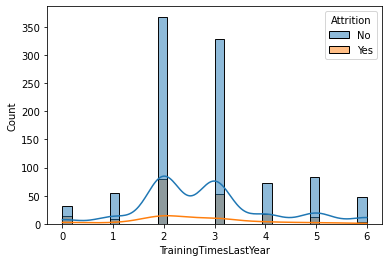

In [ ]:
sns.histplot(data=X_train, x='TrainingTimesLastYear', hue='Attrition',kde=True)
anova('TrainingTimesLastYear','Attrition')
# Concliusion : p < .05 it means TrainingTimesLastYear and attrition are corelated

F_onewayResult(statistic=25.136427293435638, pvalue=6.163117310093481e-07)

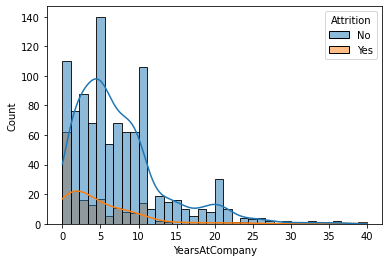

In [ ]:
sns.histplot(data=X_train, x='YearsAtCompany', hue='Attrition',kde=True)
anova('YearsAtCompany','Attrition')


In [ ]:
print (  str(round(6.163117310093481e-07,4)))

# Concliusion :  p < .05 it means YearsAtCompany and attrition are corelated

0.0


F_onewayResult(statistic=36.84020573922149, pvalue=1.7279665965933397e-09)

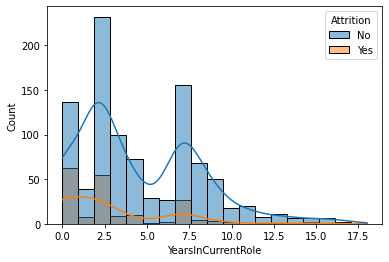

In [ ]:
sns.histplot(data=X_train, x='YearsInCurrentRole', hue='Attrition',kde=True)
anova('YearsInCurrentRole','Attrition')


In [ ]:
print (  str(round(1.7279665965933397e-09,4)))

# Concliusion :  p < .05 it means YearsInCurrentRole and attrition are corelated

0.0


F_onewayResult(statistic=1.6625069065220448, pvalue=0.1975191534219787)

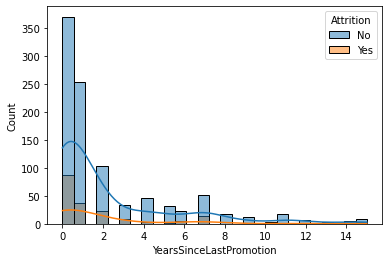

In [ ]:
sns.histplot(data=X_train, x='YearsSinceLastPromotion', hue='Attrition',kde=True)
anova('YearsSinceLastPromotion','Attrition')

# Concliusion :  p > .05 it means YearsSinceLastPromotion and attrition are not corelated

F_onewayResult(statistic=36.62307638322765, pvalue=1.925026874345956e-09)

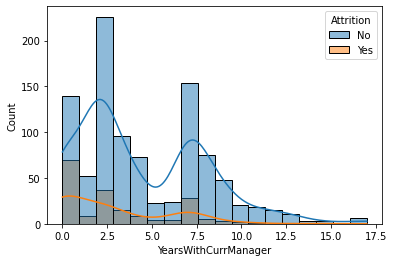

In [ ]:
sns.histplot(data=X_train, x='YearsWithCurrManager', hue='Attrition',kde=True)
anova('YearsWithCurrManager','Attrition')


In [ ]:
print (  str(round(1.925026874345956e-09,4)))

# Concliusion :  p < .05 it means YearsWithCurrManager and attrition are corelated

0.0


F_onewayResult(statistic=25.150067010325206, pvalue=6.120589919863306e-07)

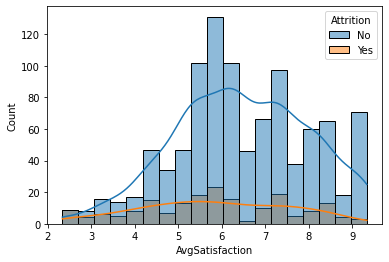

In [ ]:
sns.histplot(data=X_train, x='AvgSatisfaction', hue='Attrition',kde=True)
anova('AvgSatisfaction','Attrition')


In [ ]:
print (  str(round(6.120589919863306e-07,4)))

# Concliusion : p < .05 it means AvgSatisfaction and attrition are corelated

0.0


F_onewayResult(statistic=31.60703481347132, pvalue=2.3568611688267364e-08)

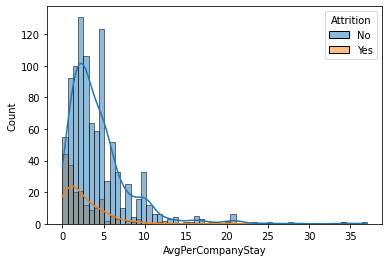

In [ ]:
sns.histplot(data=X_train, x='AvgPerCompanyStay', hue='Attrition',kde=True)
anova('AvgPerCompanyStay','Attrition')


In [ ]:

print (  str(round(2.3568611688267364e-08,4)))

# Concliusion : p < .05 it means AvgPerCompanyStay and attrition are corelated

0.0


In [ ]:
#It is apprent from above that PercentSalaryHike and YearsSinceLastPromotion is not correlated with Attrition. hence can be removed.

X_train=X_train.drop(columns=['PercentSalaryHike','YearsSinceLastPromotion'])

In [ ]:
#It is apprent from above that PercentSalaryHike and YearsSinceLastPromotion is not correlated with Attrition. hence can be removed.

X_test=X_test.drop(columns=['PercentSalaryHike','YearsSinceLastPromotion'])

In [ ]:
from dython.nominal import associations

cat_columns=X_train[['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField',  'Gender',
       'JobInvolvement', 'JobRole','JobLevel', 'MaritalStatus', 'OverTime',  'PerformanceRating', 'WorkLifeBalance',  'Emotion','StockOptionLevel']]

df_cat=cat_columns.copy()

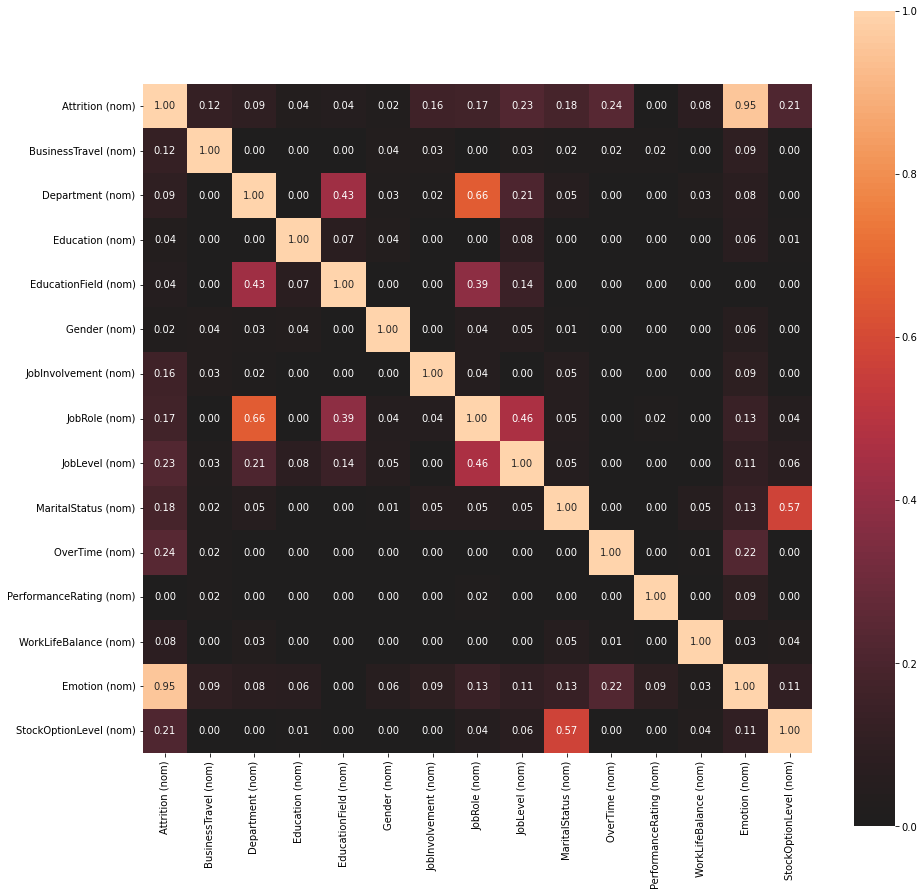

{'corr':                          Attrition (nom)  BusinessTravel (nom)  \
 Attrition (nom)                 1.000000              0.124320   
 BusinessTravel (nom)            0.124320              1.000000   
 Department (nom)                0.094449              0.000000   
 Education (nom)                 0.036435              0.000000   
 EducationField (nom)            0.039137              0.000000   
 Gender (nom)                    0.023826              0.038208   
 JobInvolvement (nom)            0.157858              0.031922   
 JobRole (nom)                   0.169971              0.000000   
 JobLevel (nom)                  0.225688              0.026515   
 MaritalStatus (nom)             0.183466              0.020340   
 OverTime (nom)                  0.238680              0.016428   
 PerformanceRating (nom)         0.000000              0.021653   
 WorkLifeBalance (nom)           0.082384              0.000000   
 Emotion (nom)                   0.953830             

In [ ]:
associations(df_cat,nom_nom_assoc='cramer',nominal_columns='all',mark_columns=True,figsize=(15,15))

<AxesSubplot:xlabel='PerformanceRating', ylabel='Count'>

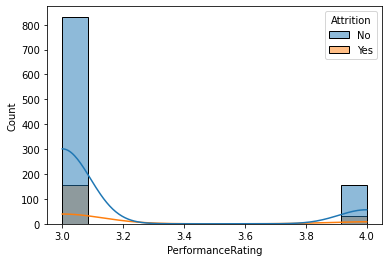

In [ ]:
sns.histplot(data=X_train, x='PerformanceRating', hue='Attrition',kde=True)

In [ ]:
#It is apprent from above that  Performace_rating is not correlated with Attrition. hence can be removed.

X_train=X_train.drop(columns=['PerformanceRating'])

X_test=X_test.drop(columns=['PerformanceRating'])


In [ ]:
X_train['StockOptionLevel'].unique()

array([1, 0, 2, 3], dtype=int64)

In [ ]:
X_train.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Emotion,AvgSatisfaction,AvgPerCompanyStay
616,51,No,Travel_Rarely,Sales,26,4,Non Technical Degree,851,Female,3,...,1,29,2,2,20,6,17,6,5.000000,9.666667
390,43,No,Travel_Rarely,Research & Development,12,3,Technical Degree,520,Male,2,...,1,25,3,3,25,10,9,6,4.000000,12.500000
677,49,No,Travel_Rarely,Research & Development,8,2,Non Technical Degree,944,Female,3,...,1,29,3,2,26,9,7,3,4.000000,5.800000
1076,54,No,Travel_Frequently,Research & Development,11,4,Technical Degree,1520,Female,3,...,1,26,2,3,14,9,12,3,6.333333,6.500000
4,27,No,Travel_Rarely,Research & Development,2,1,Technical Degree,7,Male,3,...,1,6,3,3,2,2,2,4,4.333333,0.600000


<AxesSubplot:xlabel='MaritalStatus', ylabel='Count'>

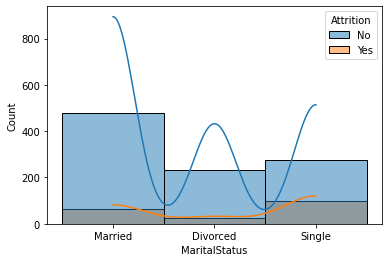

In [ ]:
sns.histplot(data=X_train, x='MaritalStatus', hue='Attrition',kde=True)


In [ ]:
#one hot encoding in training set
X_train=pd.get_dummies(X_train, columns=['BusinessTravel'], prefix='BusinessTravel', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['Department'], prefix='Department', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['Emotion'], prefix='Emotion', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['WorkLifeBalance'], prefix='WorkLifeBalance', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['OverTime'], prefix='OverTime', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['MaritalStatus'], prefix='MaritalStatus', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['JobRole'], prefix='JobRole', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['JobInvolvement'], prefix='JobInvolvement', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['EducationField'], prefix='EducationField', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['Education'], prefix='Education', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['Gender'], prefix='Gender', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['JobLevel'], prefix='JobLevel', drop_first=True)
X_train=pd.get_dummies(X_train, columns=['StockOptionLevel'], prefix='StockOptionLevel', drop_first=True) 

In [ ]:
#one hot encoding in test set
X_test=pd.get_dummies(X_test, columns=['BusinessTravel'], prefix='BusinessTravel', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['Department'], prefix='Department', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['Emotion'], prefix='Emotion', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['WorkLifeBalance'], prefix='WorkLifeBalance', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['OverTime'], prefix='OverTime', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['MaritalStatus'], prefix='MaritalStatus', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['JobRole'], prefix='JobRole', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['JobInvolvement'], prefix='JobInvolvement', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['EducationField'], prefix='EducationField', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['Education'], prefix='Education', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['Gender'], prefix='Gender', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['JobLevel'], prefix='JobLevel', drop_first=True)
X_test=pd.get_dummies(X_test, columns=['StockOptionLevel'], prefix='StockOptionLevel', drop_first=True) 

In [ ]:
    X_test.dtypes
                
                       

Age                                    int64
Attrition                             object
DistanceFromHome                       int64
EmployeeNumber                         int64
MonthlyIncome                          int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
YearsAtCompany                         int64
YearsInCurrentRole                     int64
YearsWithCurrManager                   int64
AvgSatisfaction                      float64
AvgPerCompanyStay                    float64
BusinessTravel_Travel_Frequently       uint8
BusinessTravel_Travel_Rarely           uint8
Department_Research & Development      uint8
Department_Sales                       uint8
Emotion_1                              uint8
Emotion_2                              uint8
Emotion_3                              uint8
Emotion_4                              uint8
Emotion_5                              uint8
Emotion_6                              uint8
WorkLifeBa

In [ ]:
X_train.shape

NameError: ignored

In [ ]:
X_train=X_train.drop(columns=['Attrition'])
X_test=X_test.drop(columns=['Attrition'])

The optimal number of neighbors is  13 


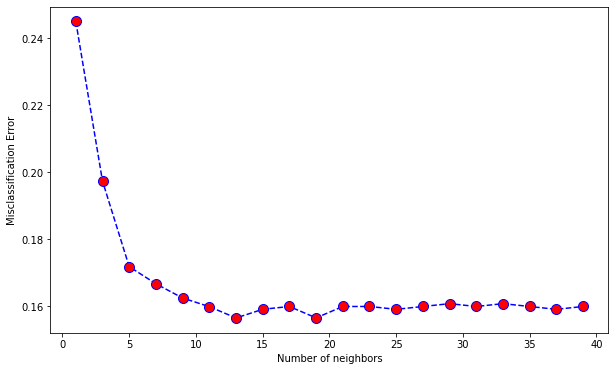

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 40, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores]
   
# determining the best k
optimal_k = neighbors[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is % d ' % optimal_k)
   
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
 
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
                y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
                y_train, clf.predict(X_train))))
 
        res = cross_val_score(clf, X_train, y_train,
                              cv = 10, scoring ='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("accuracy score: {0:.4f}\n".format(accuracy_score(
                y_train, clf.predict(X_train))))
        print("----------------------------------------------------------")
                
    elif train == False:
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
                classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(
                confusion_matrix(y_test, clf.predict(X_test))))
        print("accuracy score: {0:.4f}\n".format(
                accuracy_score(y_test, clf.predict(X_test))))
        print("-----------------------------------------------------------")
         
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.86      0.98      0.92       988
         Yes       0.60      0.13      0.22       188

    accuracy                           0.85      1176
   macro avg       0.73      0.56      0.57      1176
weighted avg       0.81      0.85      0.80      1176


Confusion Matrix: 
 [[971  17]
 [163  25]]

Average Accuracy: 	 0.8436
Accuracy SD: 		 0.0149
accuracy score: 0.8469

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.83      0.98      0.90       245
         Yes       0.00      0.00      0.00        49

    accuracy                           0.82       294
   macro avg       0.42      0.49      0.45       294
weighted avg       0.69      0.82      0.75       294


Confusion Matrix: 
 [[241   4]
 [ 49   0]]

accuracy score: 0.819

In [ ]:

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
  
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
  
def print_score(clf, X_train, y_train,
                X_test, y_test,
                train=True):
  
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
  
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))
  
        res = cross_val_score(clf, X_train, y_train,
                              cv=10, scoring='accuracy')
  
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("----------------------------------------------------------")
  
    elif train == False:
  
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
  
        print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test))))
  
        print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
  
        print("-----------------------------------------------------------")
  
print_score(rf, X_train, y_train,
            X_test, y_test,
            train=True)
  
print_score(rf, X_train, y_train,
            X_test, y_test,
            train=False)



Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       988
         Yes       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[988   0]
 [  0 188]]

Average Accuracy: 	 0.9779
Accuracy SD: 		 0.0078
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.98      1.00      0.99       245
         Yes       0.98      0.90      0.94        49

    accuracy                           0.98       294
   macro avg       0.98      0.95      0.96       294
weighted avg       0.98      0.98      0.98       294


Confusion Matrix: 
 [[244   1]
 [  5  44]]

accuracy score: 0.9796

---------------------